<a href="https://colab.research.google.com/github/shah-shivam-410/python-learning-notebooks/blob/main/project/car-price-detection/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import tensorflow as tf # models
import pandas as pd # csv reaading
import seaborn as sns # visualization
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")

In [ ]:
# Reading sample data
data = pd.read_csv("train.csv", delimiter=",")
data.head(n=5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
data.shape

(1000, 12)

In [ ]:
# sns.pairplot(data[["years", "current price", "km", "hp"]])

# sns.relplot(data, x="km", y="current price")
# sns.relplot(data, x="hp", y="current price")

In [ ]:
# Converting to tensor
tensor_data = tf.constant(data)
# print(tensor_data.shape)
# print(tensor_data)
# tensor_data[:5, :1] # Simillar to tensor_data[0:5, 0:1] , last index exclusive

In [ ]:
# Shuffling the data
tensor_data_shuffled = tf.random.shuffle(tensor_data)
tensor_data_shuffled[:5, :1]

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[138.],
       [554.],
       [274.],
       [331.],
       [281.]])>

In [ ]:
x = tensor_data_shuffled[:, 3:-1]
# x[:5]
print(x.shape)

(1000, 8)


In [ ]:
y = tensor_data_shuffled[:, -1]
print(f"Before aligning shape {y.shape}")

# Aligning shape of y with x
y = tf.expand_dims(y, axis=-1)
print(f"After aligning shape {y.shape}")
# y[:5]

Before aligning shape (1000,)
After aligning shape (1000, 1)


In [ ]:
# Ratio
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)
DATASET_SIZE

1000

In [ ]:
x_train = x[0:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[0:int(DATASET_SIZE*TRAIN_RATIO)]

x_val = x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO))]

x_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO)):]

# y_test.shape

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=False).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=False).batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=False).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
normalization = tf.keras.layers.Normalization()
normalization.adapt(x)

In [ ]:
model = tf.keras.Sequential()
model.add(normalization)

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))

model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

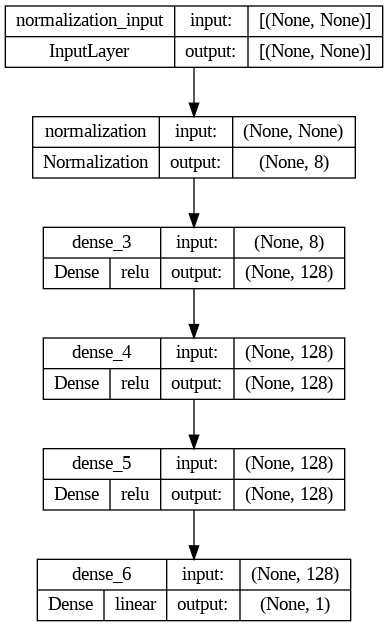

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    to_file="model1.png",
    expand_nested=True,
    show_layer_activations=True
)

In [ ]:
# Compiling module
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    verbose=1,
    validation_data=val_dataset
)

Epoch 1/100
25/25 [==============================] - 5s 27ms/step - loss: 307927.3750 - root_mean_squared_error: 333171.9062 - val_loss: 306184.8438 - val_root_mean_squared_error: 332154.0625
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 307888.8125 - root_mean_squared_error: 333136.3125 - val_loss: 306099.2812 - val_root_mean_squared_error: 332074.7500
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 307695.7500 - root_mean_squared_error: 332958.2812 - val_loss: 305739.6875 - val_root_mean_squared_error: 331741.4375
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 307034.1875 - root_mean_squared_error: 332348.3438 - val_loss: 304656.1875 - val_root_mean_squared_error: 330738.0625
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 305288.8125 - root_mean_squared_error: 330740.6562 - val_loss: 302049.9062 - val_root_mean_squared_error: 328327.9375
Epoch 6/100
25/25 [=========================

`history.history`
Sample output:
{'loss': [308517.03125,
  308517.03125,
  308516.96875,
  308513.78125],
'root_mean_squared_error': [329998.96875,
  329995.96875,
  329709.1875,
  329706.25]}

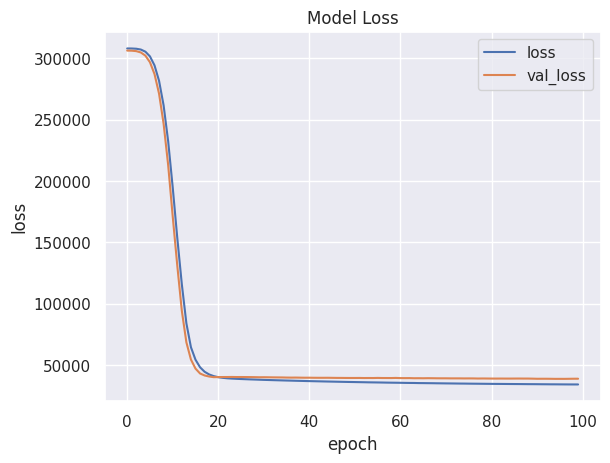

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])
plt.show()


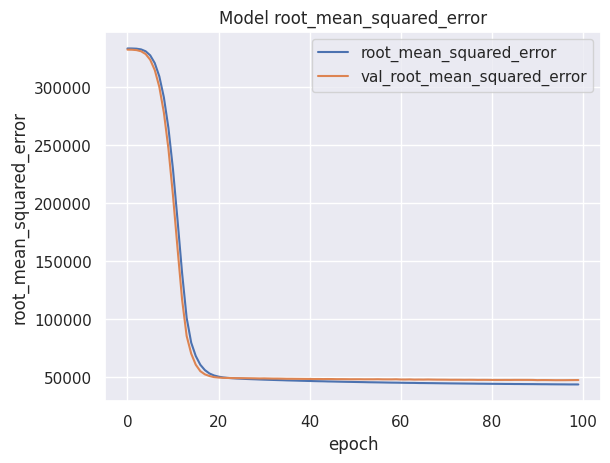

In [ ]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("Model root_mean_squared_error")
plt.xlabel("epoch")
plt.ylabel("root_mean_squared_error")
plt.legend(["root_mean_squared_error", "val_root_mean_squared_error"])
plt.show()

In [ ]:
model.evaluate(test_dataset, verbose=1)

4/4 [==============================] - 0s 4ms/step - loss: 33359.5781 - root_mean_squared_error: 40572.9102


[33359.578125, 40572.91015625]

In [ ]:
x_test.shape
# TensorShape([100, 8])
x_test[0].shape
# TensorShape([8])
# We need to convert from [8] to [1, 8]
# tf.expand_dims(x_test[0], axis=0).shape

TensorShape([8])

In [ ]:
### Testing the model!!
actual = model.predict(tf.expand_dims(x_test[0], axis=0))
expected = y_test[0]
print(f"Actual: {actual}, Expected: {expected}")
print(f"Difference: {expected-actual}")

1/1 [==============================] - 0s 74ms/step
Actual: [[445743.72]], Expected: [403213.5]
Difference: [[-42530.21875]]


In [ ]:
y_actual = list(model.predict(x_test)[:,0])
y_expected = list(y_test[:,0].numpy())


4/4 [==============================] - 0s 4ms/step


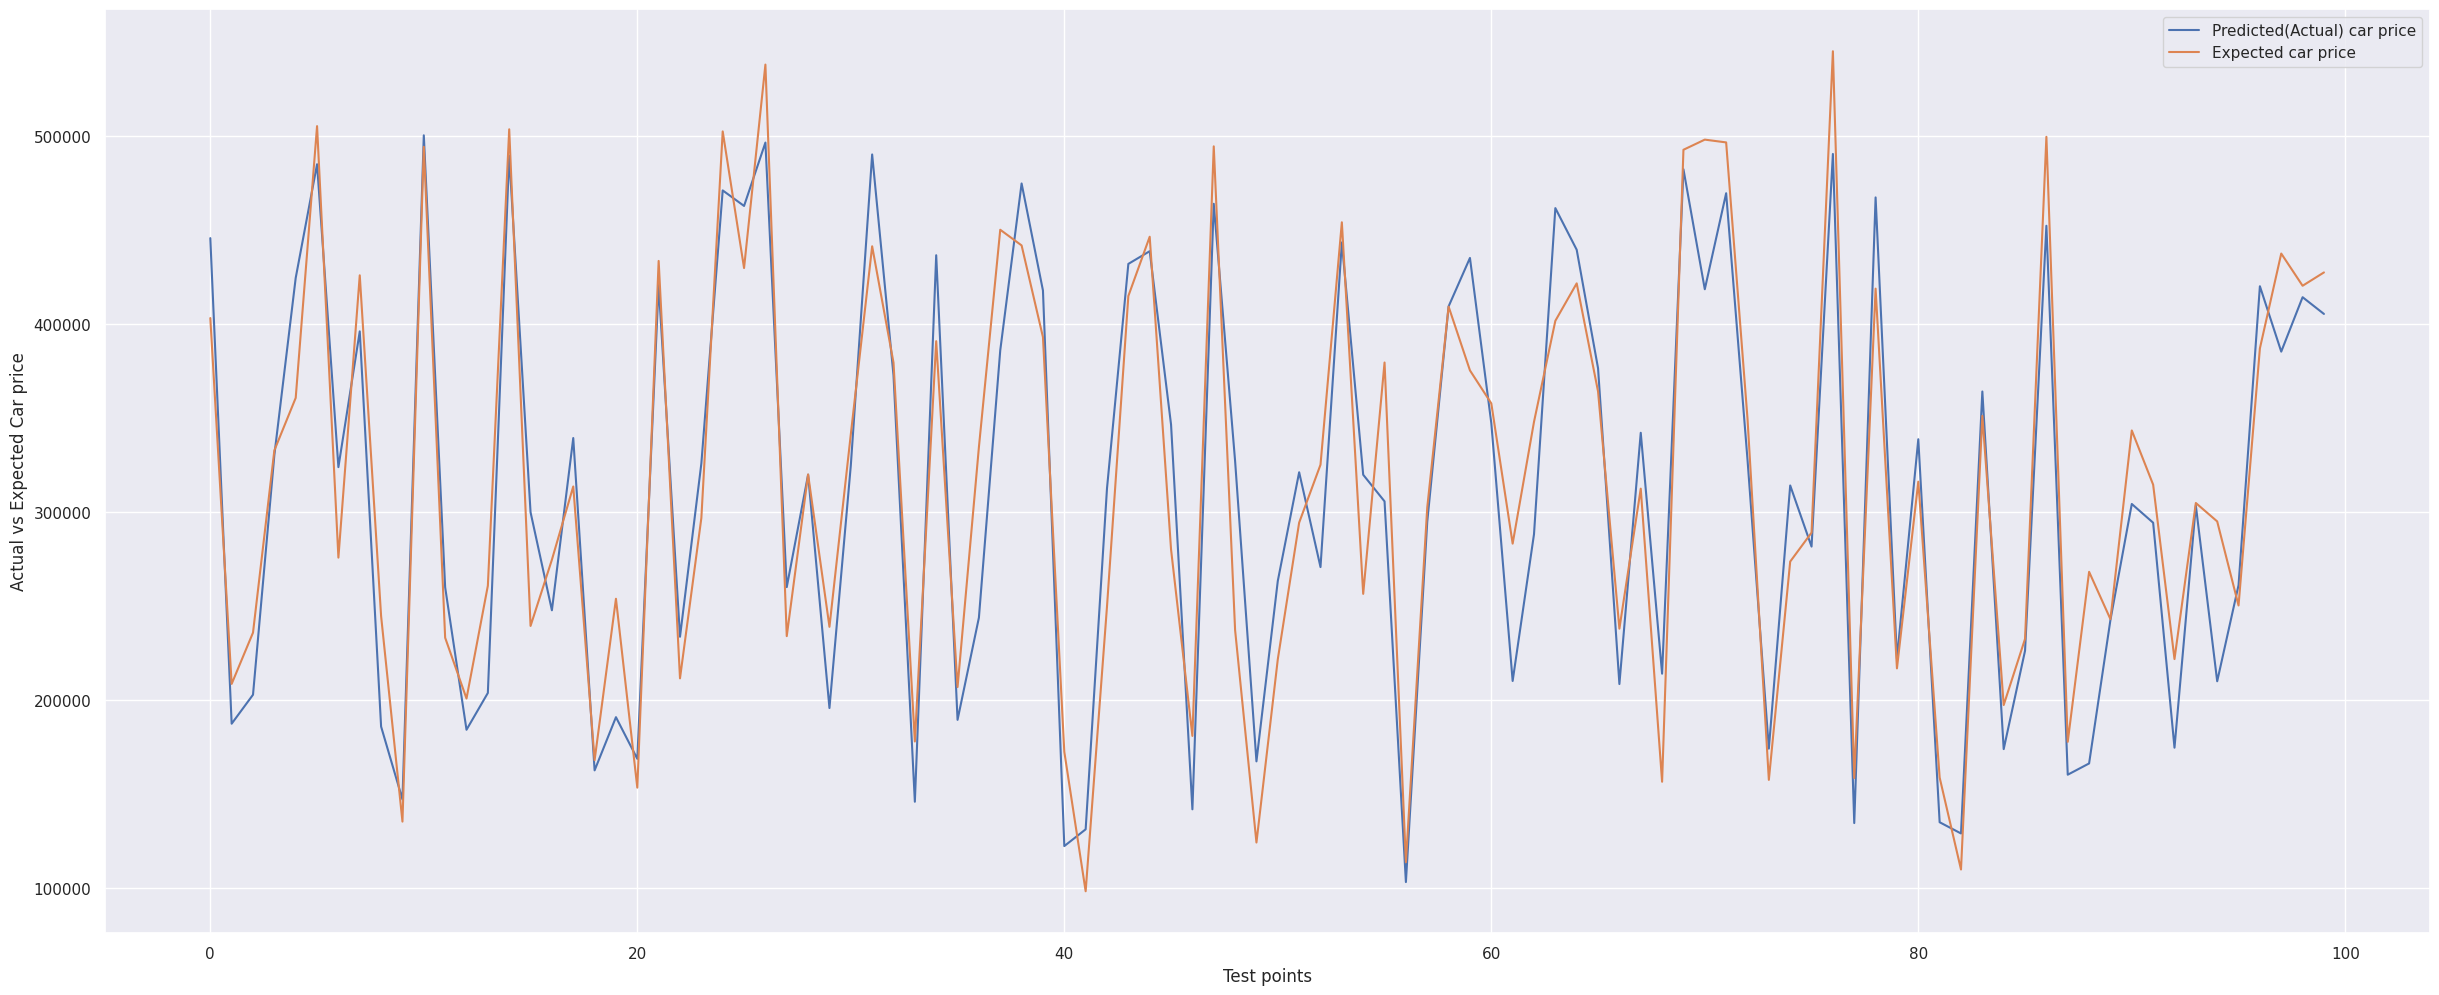

In [ ]:
### Plotting evaluation chart

# indexes = np.arange(0,100,1)
# plt.figure(figsize=(40,12))
# width = 0.4
# plt.bar(indexes, y_actual, width, label="Predicted car price")
# plt.bar(indexes+width, y_expected, width, label="Expected car price")
# plt.xlabel("Test points")
# plt.ylabel("Actual vs Expected Car price")
# plt.show()

indexes = np.arange(0,100,1)
plt.figure(figsize=(30,12))
width = 0.4

plt.plot(indexes, y_actual)
plt.plot(indexes, y_expected)
plt.legend(["Predicted(Actual) car price", "Expected car price"])

plt.xlabel("Test points")
plt.ylabel("Actual vs Expected Car price")
plt.show()
